In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/nikita/Desktop/online_sales_dataset.csv'
df = pd.read_csv(file_path)
print("Датасет успешно загружен")

Датасет успешно загружен


In [53]:
# Стили графиков
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Бизнес Вопросы для Анализа
#1. В какие время продажи наиболее активны?
#2. Какая категория товаров приносит наибольшую общую выручку?
#3. Какие страны являются крупными рынками по объему продаж?
#4. Какой канал продаж более прибыльный онлайн или оффлайн?
#5. Как доля возвратов соотносится с категорией товара и страной?

df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 44804 entries, 0 to 49781
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceNo          44804 non-null  int64         
 1   StockCode          44804 non-null  object        
 2   Description        44804 non-null  object        
 3   Quantity           44804 non-null  int64         
 4   InvoiceDate        44804 non-null  datetime64[ns]
 5   UnitPrice          44804 non-null  float64       
 6   CustomerID         44804 non-null  float64       
 7   Country            44804 non-null  object        
 8   Discount           44804 non-null  float64       
 9   PaymentMethod      44804 non-null  object        
 10  ShippingCost       44804 non-null  float64       
 11  Category           44804 non-null  object        
 12  SalesChannel       44804 non-null  object        
 13  ReturnStatus       44804 non-null  object        
 14  ShipmentPro

In [54]:
# Очистка

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Sales'] = df['Quantity'] * df['UnitPrice'] * (1 - df['Discount'])
df['Hour'] = df['InvoiceDate'].dt.hour
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Month'] = df['InvoiceDate'].dt.month_name()
df['DayOfWeek_Num'] = df['InvoiceDate'].dt.dayofweek
initial_rows = len(df)
df.dropna(subset=['CustomerID'], inplace=True)
initial_rows = len(df)
df.drop_duplicates(inplace=True)
df['PaymentMethod'] = df['PaymentMethod'].str.replace('paypall', 'PayPal', case=False)

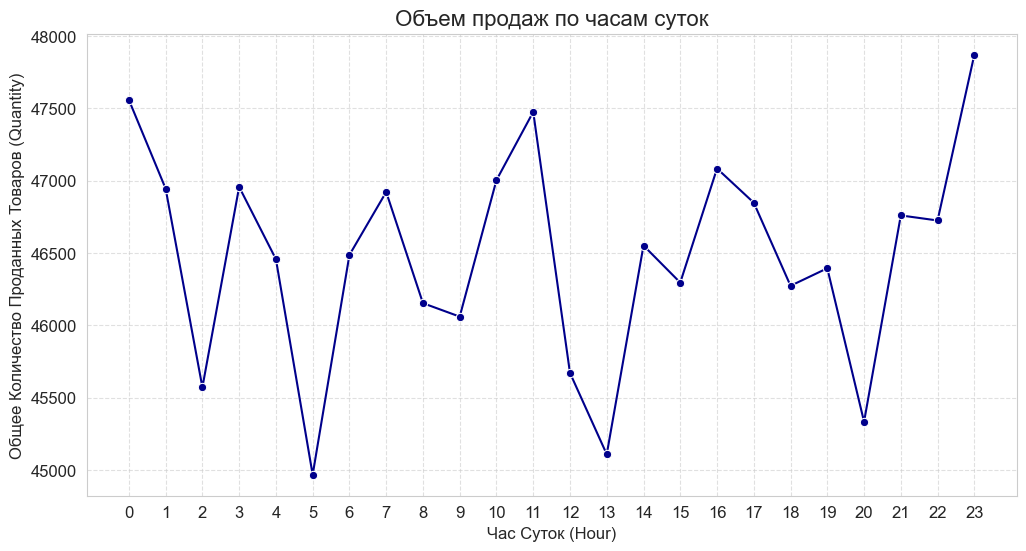

In [55]:
# Анализ спроса по времени
demand_hourly = df.groupby('Hour')['Quantity'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Quantity', data=demand_hourly, marker='o', color='darkblue')
plt.title('Объем продаж по часам суток', fontsize=16)
plt.xlabel('Час Суток (Hour)')
plt.ylabel('Общее Количество Проданных Товаров (Quantity)')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

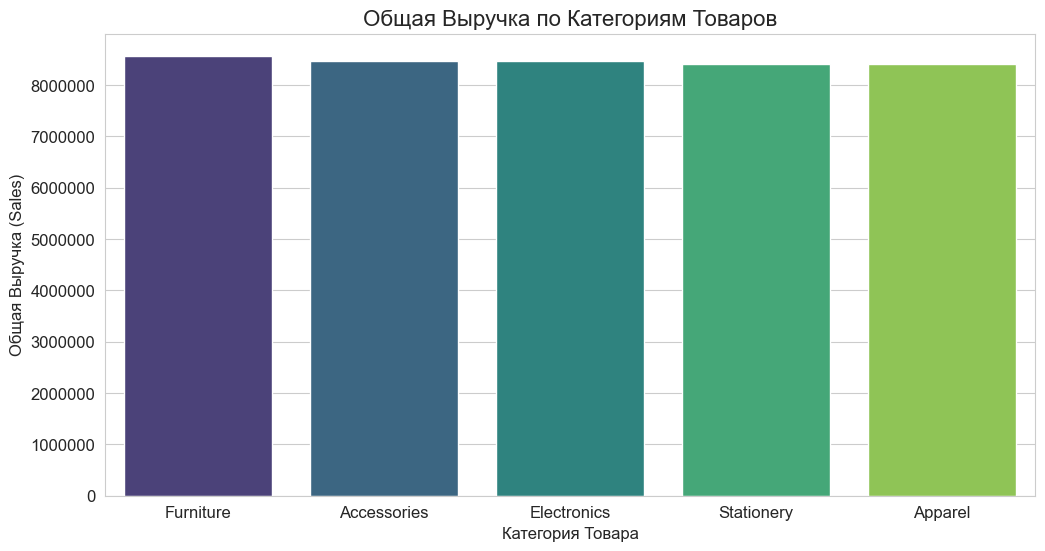

In [56]:
# Анализ прибыльности по Категориям
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Sales', data=sales_by_category, hue='Category', palette='viridis', legend=False)
plt.title('Общая Выручка по Категориям Товаров', fontsize=16)
plt.xlabel('Категория Товара')
plt.ylabel('Общая Выручка (Sales)')
plt.ticklabel_format(style='plain', axis='y') # Убираем экспоненциальное представление
plt.show()

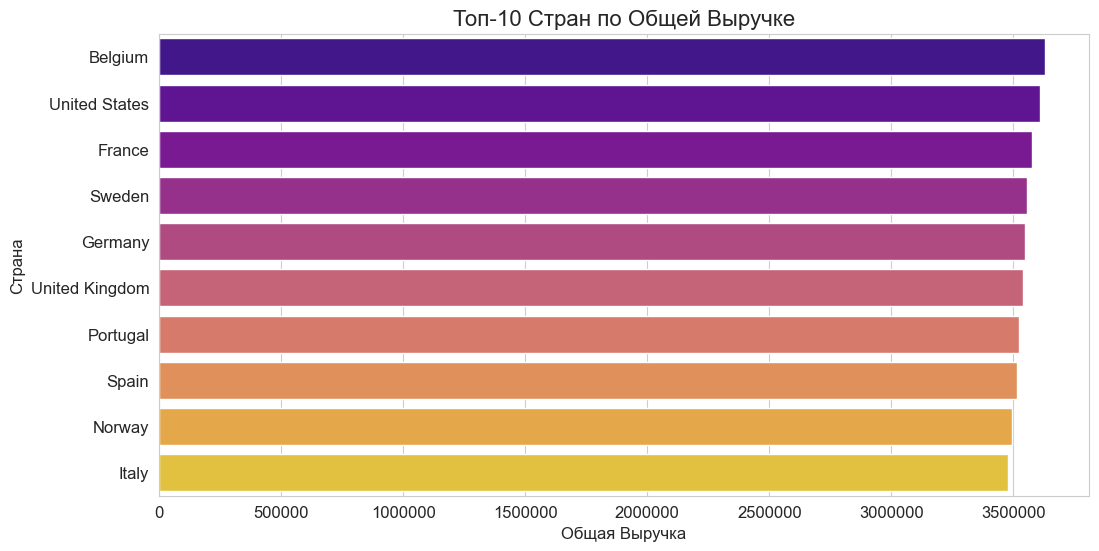

In [57]:
# Географический анализ топ-10 стран по продажам
sales_by_country = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Country', data=sales_by_country, hue='Country', palette='plasma', legend=False)
plt.title('Топ-10 Стран по Общей Выручке', fontsize=16)
plt.xlabel('Общая Выручка')
plt.ylabel('Страна')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

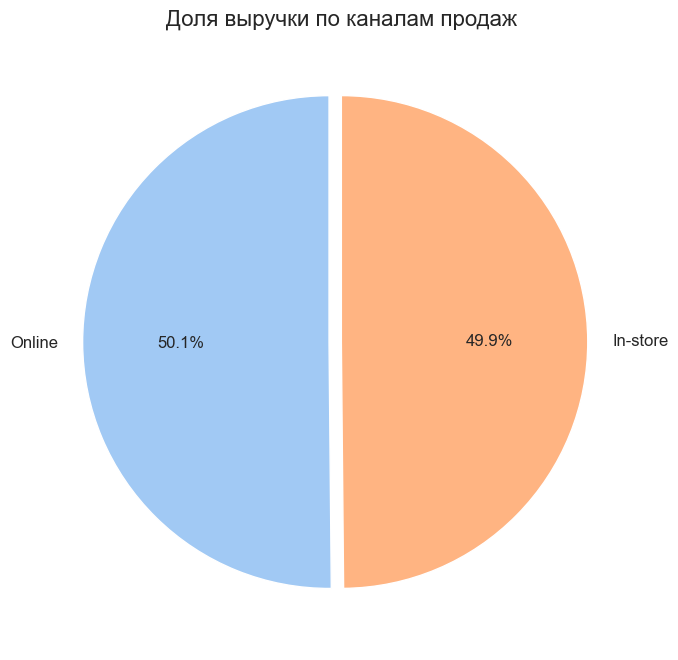

In [58]:
# Эффективность каналов продаж
sales_by_channel = df.groupby('SalesChannel')['Sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 8))
plt.pie(sales_by_channel['Sales'], labels=sales_by_channel['SalesChannel'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), explode=(0.05, 0))
plt.title('Доля выручки по каналам продаж', fontsize=16)
plt.show()

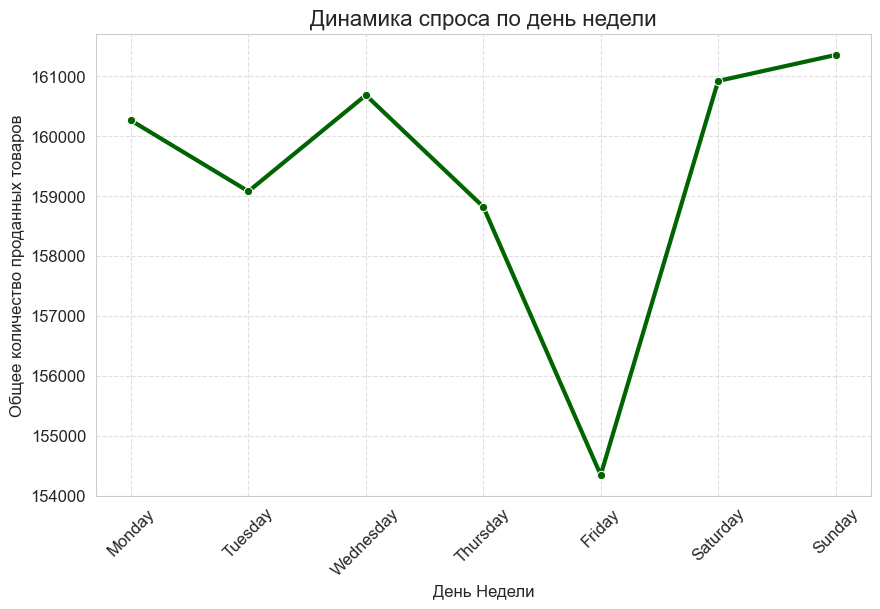

In [59]:
# 5. Анализ спроса по день недели
day_order_num = [0, 1, 2, 3, 4, 5, 6]
day_order_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
demand_weekly = df.groupby(['DayOfWeek', 'DayOfWeek_Num'])['Quantity'].sum().reset_index()
demand_weekly = demand_weekly.sort_values('DayOfWeek_Num')
plt.figure(figsize=(10, 6))
sns.lineplot(
    x='DayOfWeek_Num',
    y='Quantity',
    data=demand_weekly,
    marker='o',
    color='darkgreen',
    linewidth=3
)
plt.xticks(ticks=day_order_num, labels=day_order_name, rotation=45)
plt.title('Динамика спроса по день недели', fontsize=16)
plt.xlabel('День Недели')
plt.ylabel('Общее количество проданных товаров')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

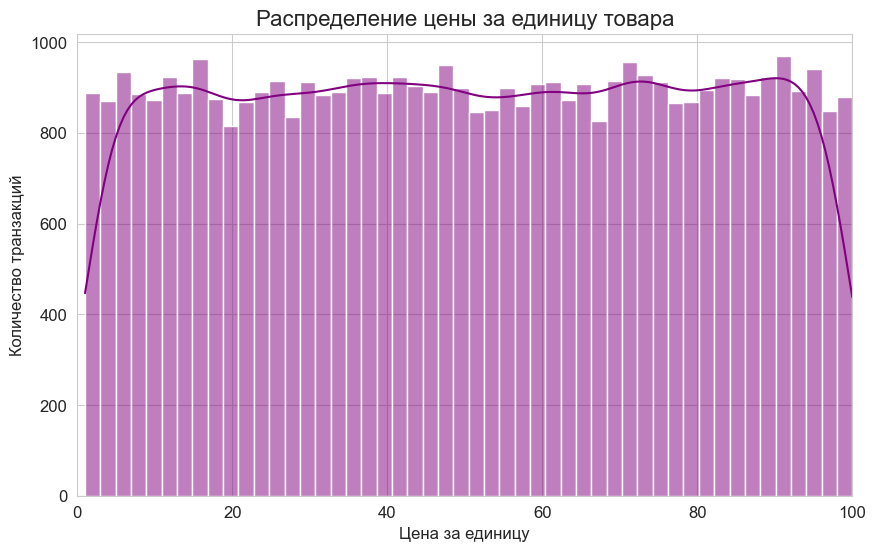

In [60]:
# Гистограмма
plt.figure(figsize=(10, 6))
sns.histplot(df['UnitPrice'], bins=50, kde=True, color='purple')
plt.title('Распределение цены за единицу товара', fontsize=16)
plt.xlabel('Цена за единицу')
plt.ylabel('Количество транзакций')
plt.xlim(0, 100)
plt.show()

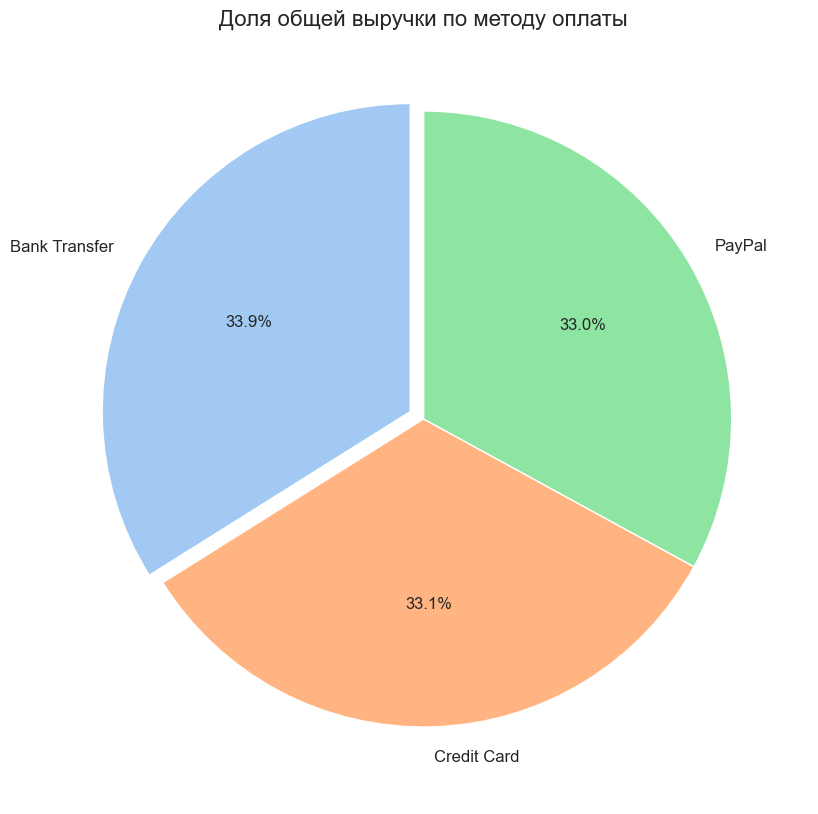

In [61]:
# Выручка по методам оплаты
sales_by_payment = df.groupby('PaymentMethod')['Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 10))
plt.pie(
    sales_by_payment['Sales'],
    labels=sales_by_payment['PaymentMethod'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    explode=(0.05, 0, 0)
)
plt.title('Доля общей выручки по методу оплаты', fontsize=16)
plt.show()

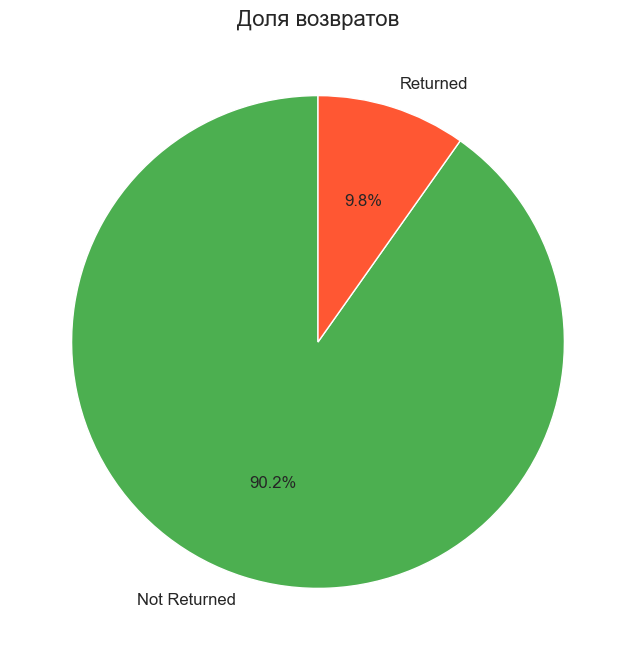

In [63]:
# Доля возвратов
return_counts = df['ReturnStatus'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(return_counts, labels=return_counts.index, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF5733'])
plt.title('Доля возвратов', fontsize=16)
plt.show()

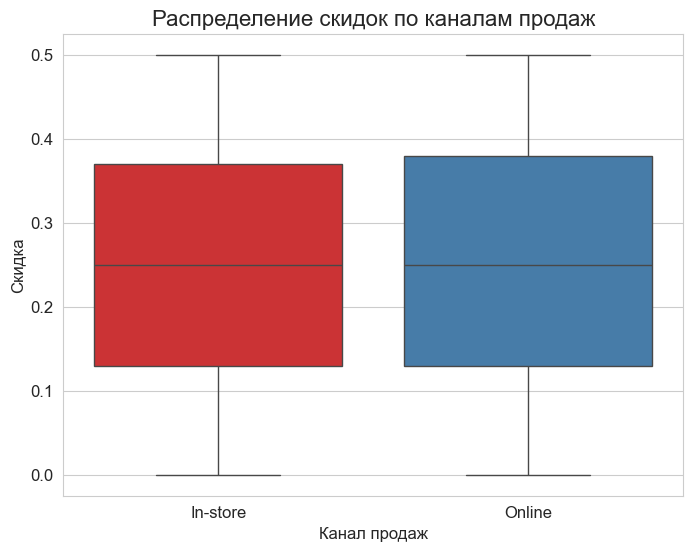

In [52]:
# Средняя скидка по каналам продаж
plt.figure(figsize=(8, 6))
sns.boxplot(x='SalesChannel', y='Discount', data=df, palette='Set1', hue='SalesChannel', legend=False)
plt.title('Распределение скидок по каналам продаж', fontsize=16)
plt.xlabel('Канал продаж')
plt.ylabel('Скидка')
plt.show()

In [69]:
returned_status = df[df['ReturnStatus'] == 'Returned']
print(returned_status)

       InvoiceNo StockCode   Description  Quantity         InvoiceDate  \
2         231932  SKU_1501    Headphones        49 2020-01-01 02:00:00   
10        621430  SKU_1144      Notebook        49 2020-01-01 10:00:00   
19        887201  SKU_1119     USB Cable        46 2020-01-01 19:00:00   
20        421879  SKU_1578    Wall Clock        43 2020-01-01 20:00:00   
33        586232  SKU_1722    Wall Clock        14 2020-01-02 09:00:00   
...          ...       ...           ...       ...                 ...   
49751     352868  SKU_1131     Desk Lamp        17 2025-09-03 23:00:00   
49757     170681  SKU_1613      Blue Pen         3 2025-09-04 05:00:00   
49769     701257  SKU_1092  Office Chair        19 2025-09-04 17:00:00   
49775     405597  SKU_1140      Backpack        37 2025-09-04 23:00:00   
49777     354083  SKU_1562      Blue Pen        25 2025-09-05 01:00:00   

       UnitPrice  CustomerID         Country  Discount  PaymentMethod  ...  \
2          29.11     50472.0     